In [171]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from keras import Sequential
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

In [172]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

In [173]:
y = np.array([0, 1, 1, 0])

In [174]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [175]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 3)                 9         
                                                                 
 dense_50 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [177]:
history = model.fit(X, y, epochs=2000, batch_size=32, verbose=0)

KeyboardInterrupt: 

In [ ]:
y_pred = [0 if i < 0.5 else 1 for i in model.predict(X)]

1/1 [==============================] - 0s 39ms/step


In [ ]:
y_pred

[0, 0, 1, 0]

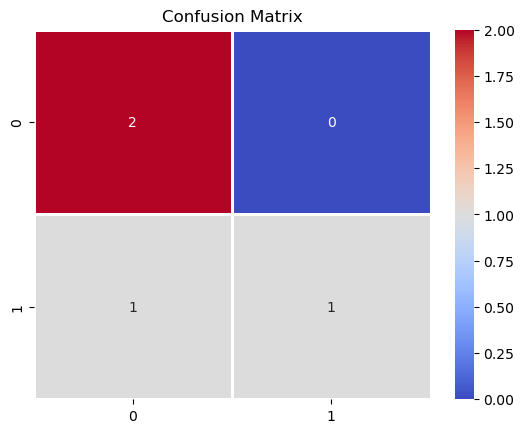

In [ ]:
cf_matrix = confusion_matrix(y, y_pred)

sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.show()

## Função Seno

In [ ]:
X = np.linspace(0, 10, 1000).reshape(-1, 1)

In [ ]:
y = np.sin(X)

In [ ]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 25)                50        
                                                                 
 dense_18 (Dense)            (None, 25)                650       
                                                                 
 dense_19 (Dense)            (None, 25)                650       
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,376
Trainable params: 1,376
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y, epochs=500, batch_size=32, verbose=0)

In [ ]:
y_pred = model.predict(X)

32/32 [==============================] - 0s 2ms/step


In [ ]:
mean_squared_error(y, y_pred)

0.00021939720139278282

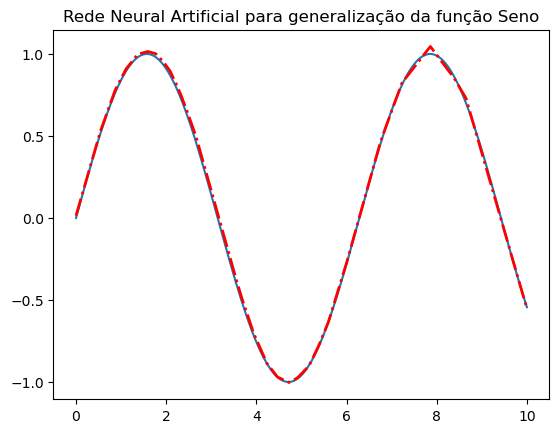

In [ ]:
plt.title('Rede Neural Artificial para generalização da função Seno')

plt.plot(X, y, label='True')
plt.plot(X, y_pred, label='Predicted', linestyle='-.', linewidth=2, color='r')
plt.show()

## MNIST

In [196]:
train_samples = 20000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/lucas/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [197]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [198]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

In [199]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10


625/625 [==============================] - 11s 18ms/step - loss: 0.3185 - val_loss: 0.2212
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1261 - val_loss: 0.2024
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0777 - val_loss: 0.1811
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0497 - val_loss: 0.1947
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0456 - val_loss: 0.2567
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0534 - val_loss: 0.2145
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.0420 - val_loss: 0.2645
Epoch 8/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0287 - val_loss: 0.2821
Epoch 9/10
625/625 [==============================] - 10s 15ms/step - loss: 0.0365 - val_loss: 0.2916
Epoch 10/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0363 - val_loss: 0

In [200]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


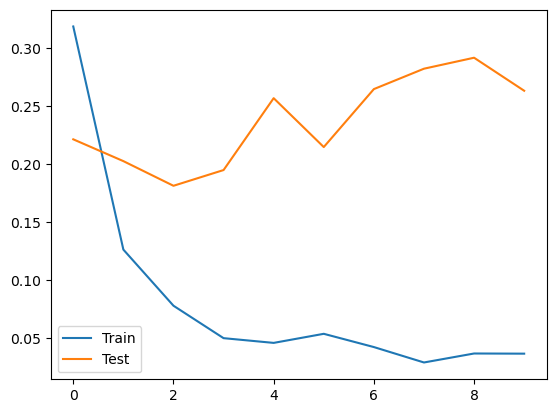

In [201]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()

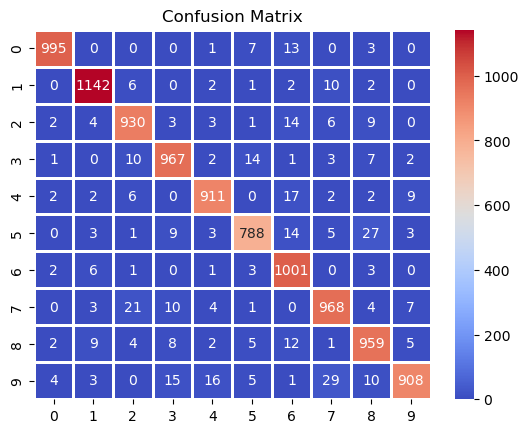

In [202]:
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# model = Sequential()
# model.add(Input(shape=(2,)))
    
# model.add(Dense())
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.05))

# model.add(Dense(_, activation=_))    
# model.compile(loss = _, metrics = _, optimizer = _)